In [65]:
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Count'>

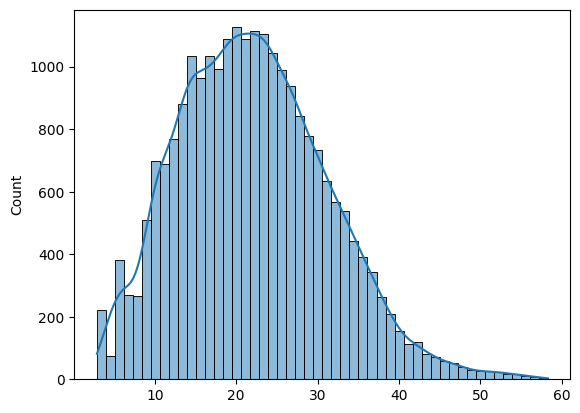

In [74]:
data = sp.io.loadmat('coord1PHP.mat')
protdist = data['protdist'][:,0]
A = data['A']
Nnode = A.shape[0]

sns.histplot(protdist, kde=True, bins=50)

/tmp/ipykernel_2723/2899854611.py:2: RuntimeWarning: divide by zero encountered in divide
  sns.heatmap(1./D)


<Axes: >

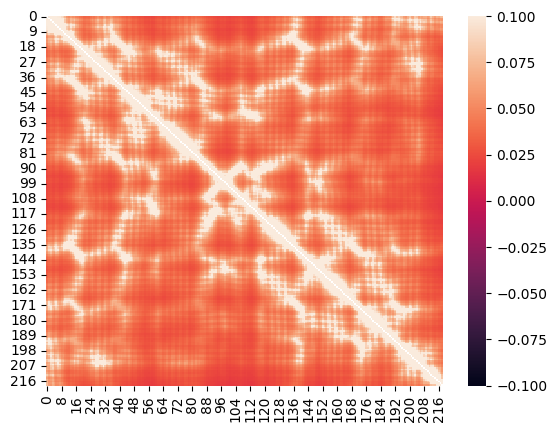

In [75]:
D = sp.spatial.distance.squareform(protdist)
sns.heatmap(1./D)

<Axes: >

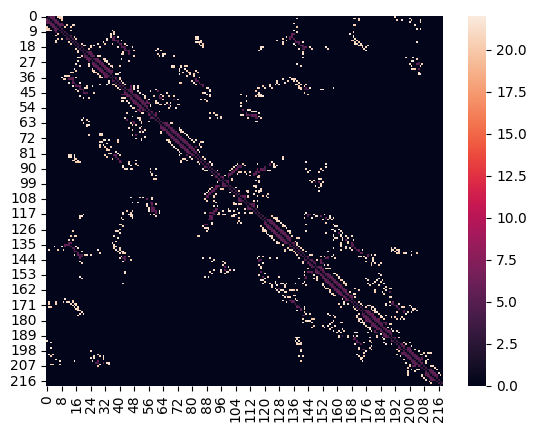

In [77]:
Net6 = (D < 6) * D
Net10 = (D > 10) * (D < 11) * D
N1 = (D < 11) * D
sns.heatmap(Net6 + 2*Net10)

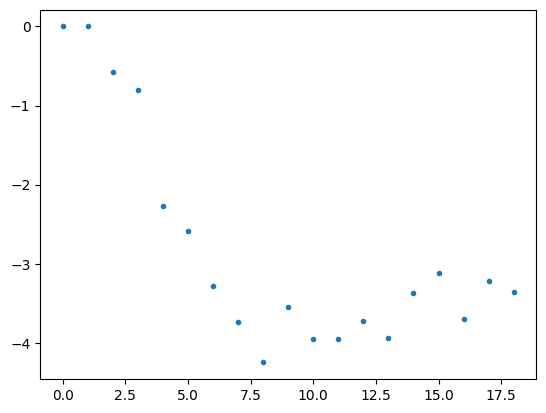

In [79]:
Kdiag = []

for index in range(Nnode):
    Kdiag.append(np.sum(np.diag(A, index))/(Nnode - index))

plt.plot(np.log(Kdiag[1:20]), '.')

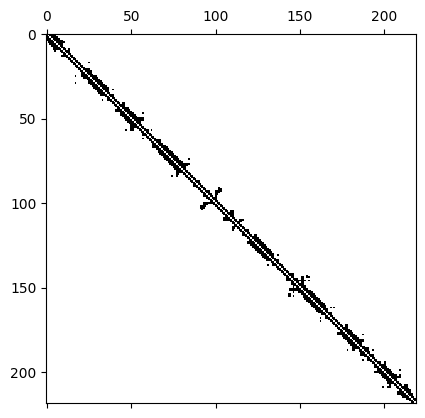

In [83]:
Nkd = 12
Ad = np.zeros((Nnode, Nnode))

for index in range(-Nkd, Nkd):
    Ad += np.diag(np.diag(A, index), index)

plt.spy(Ad)

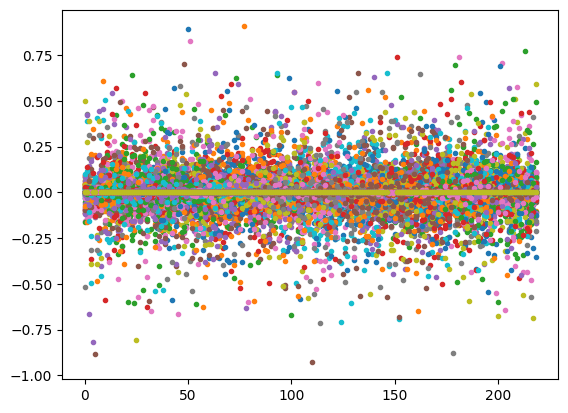

In [92]:
# valAd, vecAd = np.linalg.eig(sp.sparse.csgraph.laplacian(Ad))
# plt.plot(vecAd, '.')

/home/grufoony/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


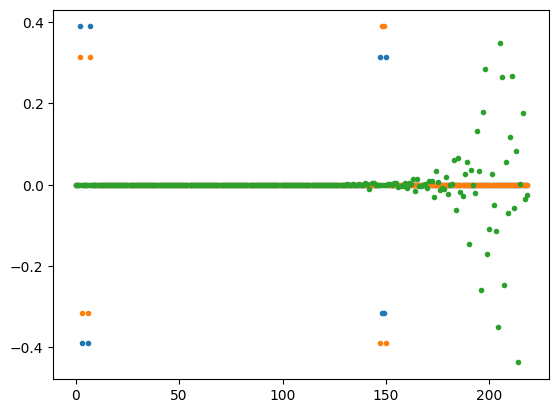

In [96]:
# i1 = Nnode - 1
# i2 = Nnode - 2
# i3 = Nnode - 3
# plt.plot(vecAd[:,[i1, i2, i3]], '.')

/home/grufoony/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


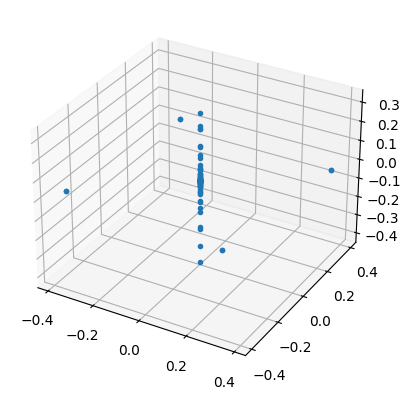

In [99]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# plt.plot(vecAd[:,i1], vecAd[:,i2], vecAd[:,i3], '.')